In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [114]:
nodes = [1,1]  # int array since only degree matters for this model

# start with two nodes connected to each other

for i in range(20000):
    total_degree = 2*(i+1)
    weights = [n/total_degree for n in nodes] # node-wise probability dist. of adding new node
    
    
    stacked_weights = np.cumsum(weights) # partitions unit interval for weighted RNG
    p = np.random.random()
    ind = None
    
    for j, weight in enumerate(stacked_weights):
        if p < weight:
            ind = j
            break
            
    nodes[ind] += 1  # add new node to chosen index
    nodes.append(1)  # new node added to list of nodes with degree 1

In [115]:
ordered_nodes = np.flip(np.sort(nodes))
ordered_nodes

array([230, 105, 103, ...,   1,   1,   1])

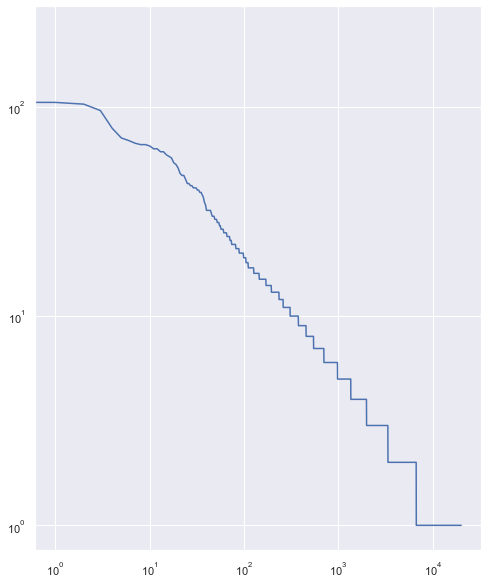

In [116]:
sns.set()

fig, ax = plt.subplots((1), figsize=(8,10))
ax.set(xscale="log", yscale="log")

ax = sns.lineplot(range(len(nodes)), ordered_nodes)

In [117]:
x_vals = np.array(range(1, len(nodes) + 1))

paired_data = np.stack([x_vals, ordered_nodes]).transpose()
paired_data = pd.DataFrame(data=paired_data, columns=["x", "degree"]).apply(lambda x: np.log(x+1))

paired_data.head()

,x,degree
0,0.693147,5.442418
1,1.098612,4.663439
2,1.386294,4.644391
3,1.609438,4.574711
4,1.791759,4.382027


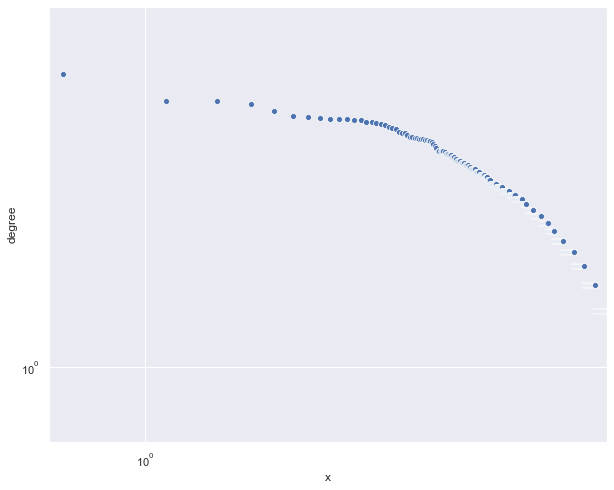

In [118]:
fig, ax = plt.subplots((1), figsize=(10,8))
ax.set(xscale="log", yscale="log") # scatterplot seems to have trouble with this
ax.set_xlim(0.65, 8)
ax.set_ylim(0.65, 8)

ax = sns.scatterplot(x="x", y="degree", data=paired_data)  # marker outlines cover up other markers 